In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!cp -r "/content/gdrive/My Drive/Colab Notebooks/music-compression/" ./

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API" -O data.zip && rm -rf /tmp/cookies.txt

--2019-11-14 05:05:34--  https://docs.google.com/uc?export=download&confirm=qJ_K&id=1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API
Resolving docs.google.com (docs.google.com)... 74.125.203.102, 74.125.203.101, 74.125.203.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.203.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6ln96saal0ltgmd7thvamh9415c1p31v/1573704000000/00405666016553047732/*/1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API?e=download [following]
--2019-11-14 05:05:35--  https://doc-0g-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6ln96saal0ltgmd7thvamh9415c1p31v/1573704000000/00405666016553047732/*/1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API?e=download
Resolving doc-0g-4s-docs.googleusercontent.com (doc-0g-4s-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-0g-4s-docs.googleusercontent.com

In [0]:
!unzip -qq data.zip -d /content/music-compression/data/sample/fma_small/

In [5]:
!pip install pydub

In [6]:
%cd music-compression/

/content/music-compression


In [0]:
!rm -rf 'data/sample/fma_small/data/train/'

In [0]:
import os
from models.cnn_autoencoder import CNNAutoEncoder
from analysis.generate_compression_sample import generate_samples
from analysis.general import get_files_for_labels

import torch

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [10]:
model_checkpoint_path = 'model_checkpoints/cnn_autoencoder_type1/checkpoint.pt'

checkpoint = torch.load(model_checkpoint_path, map_location='cuda')

model = CNNAutoEncoder().cuda()
model.load_state_dict(checkpoint['model_state_dict'])

model.eval()

CNNAutoEncoder(
  (encoder_model): Sequential(
    (conv1): Conv1d(1, 64, kernel_size=(512,), stride=(256,))
    (relu1): ReLU(inplace=True)
    (conv2): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
    (relu2): ReLU(inplace=True)
  )
  (decoder_model): Sequential(
    (convT2): ConvTranspose1d(32, 64, kernel_size=(1,), stride=(1,))
    (reluT2): ReLU(inplace=True)
    (convT1): ConvTranspose1d(64, 1, kernel_size=(512,), stride=(256,))
  )
  (loss_criterion_mse): MSELoss()
  (loss_criterion_l1): L1Loss()
)

In [0]:
labels_to_file_map, label_set = get_files_for_labels(
    'data/sample/fma_small/data/test/', 
    'data/sample/fma_small/data/file_to_labels.csv'
)

mean_val = torch.load('data/sample/fma_small/data/mean.pt', map_location='cuda')
std_val = torch.load('data/sample/fma_small/data/std.pt', map_location='cuda')
audio_save_path = '/content/gdrive/My Drive/Colab Notebooks/music-compression/results/compression/time_v1_big/'

if not os.path.exists(audio_save_path):
  os.mkdir(audio_save_path)

generate_samples(model, mean_val, std_val, labels_to_file_map, audio_save_path)

In [0]:
from analysis.latent_space_viz import latent_space_analysis

In [43]:
overall_space, genre_space, sample_latent_space = latent_space_analysis(model, 'data/sample/fma_small/data/', is_cuda = True)

Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 50 items
Processing 46 items
Sparsity ratio = 0.018187000409920065
Num items analysed = 2296


In [0]:
import matplotlib.pyplot as plt

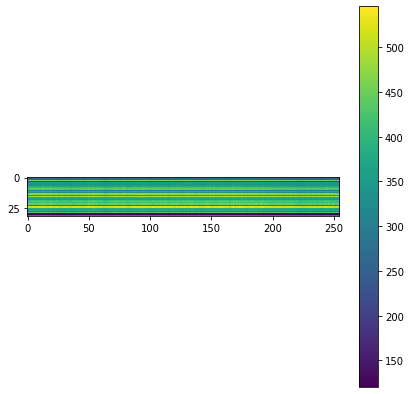

In [46]:
plt.figure(figsize=(7,7))
plt.imshow(overall_space)
plt.colorbar()
plt.show()

In [0]:
import numpy as np
import matplotlib

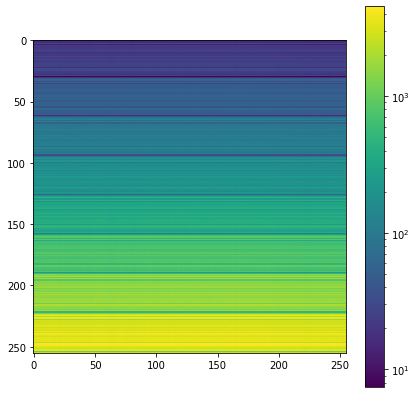

In [48]:
concat_space = np.vstack(genre_space)
plt.figure(figsize=(7,7))
plt.imshow(concat_space, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

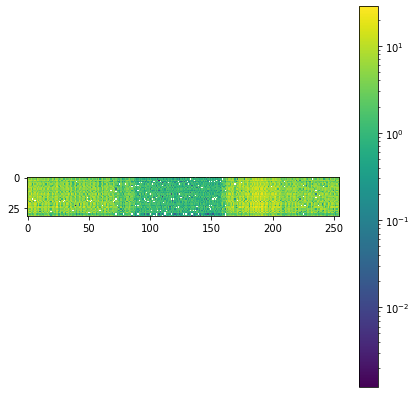

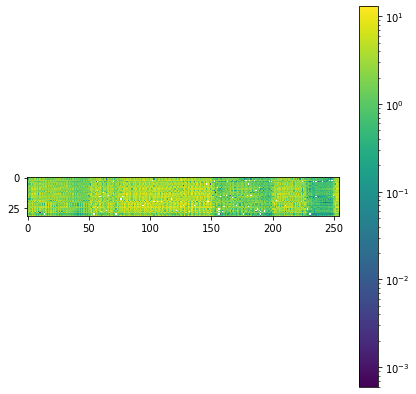

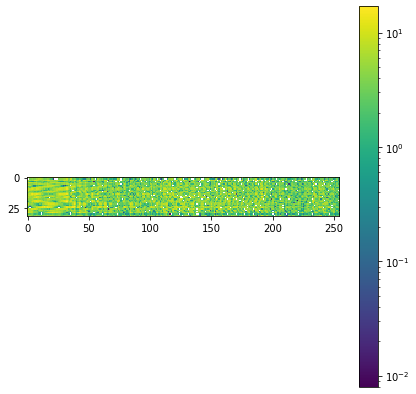

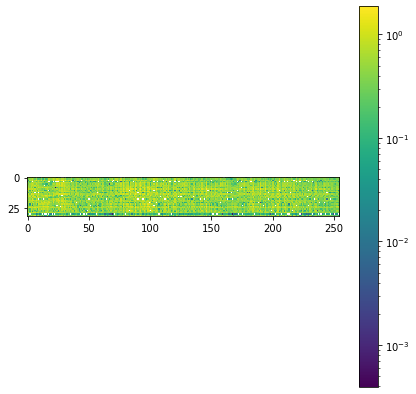

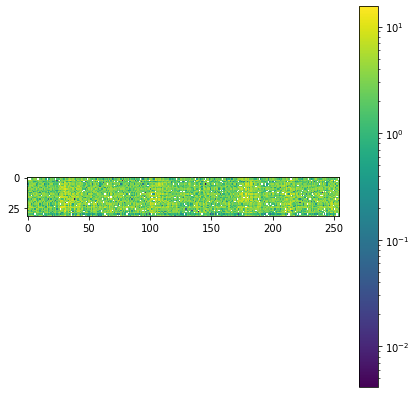

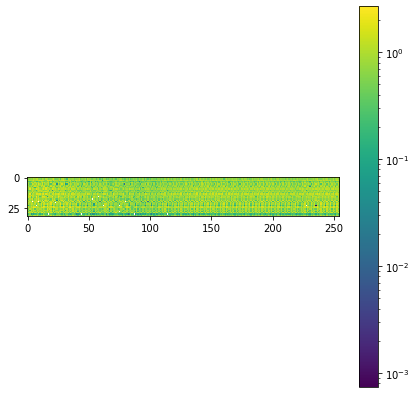

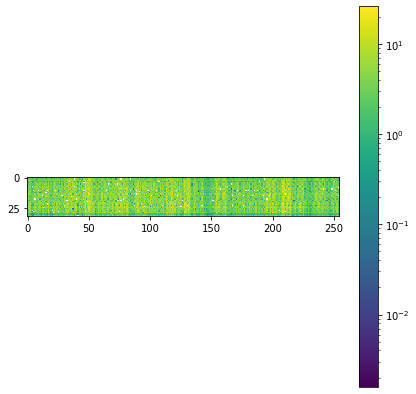

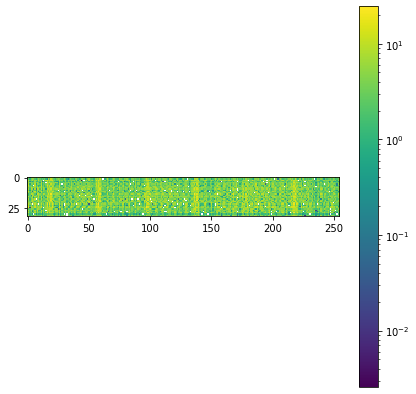

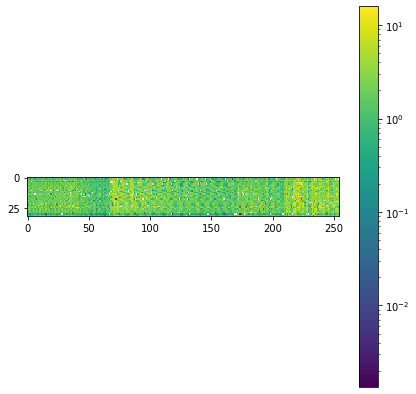

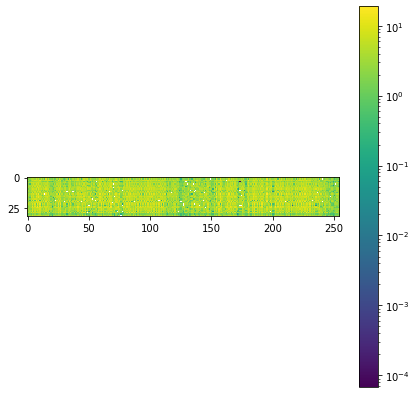

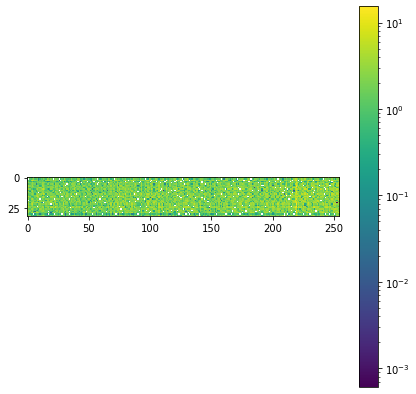

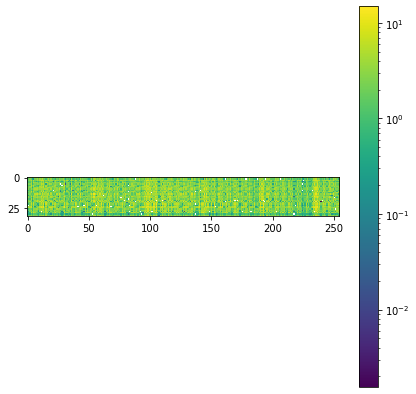

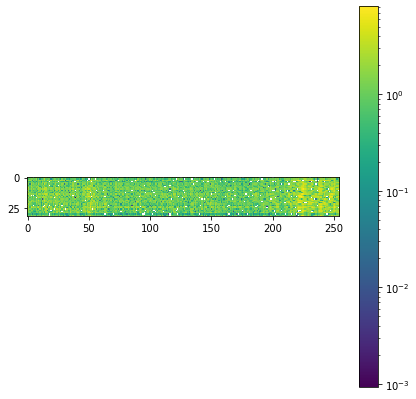

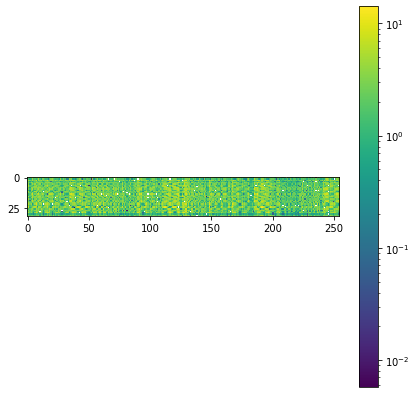

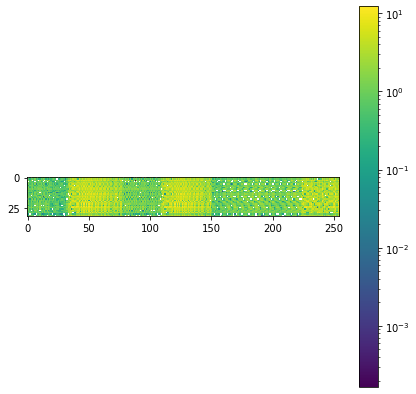

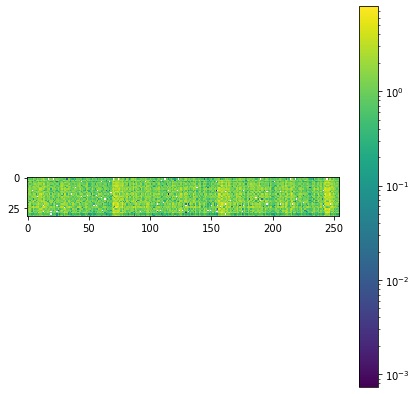

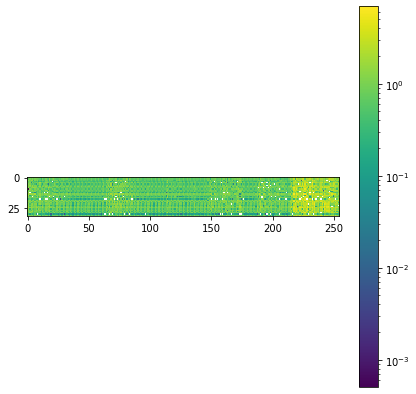

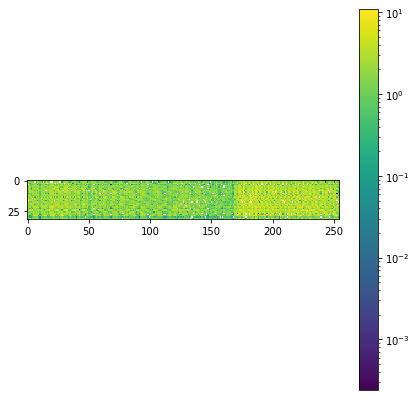

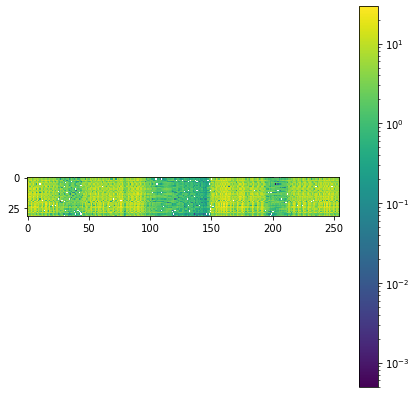

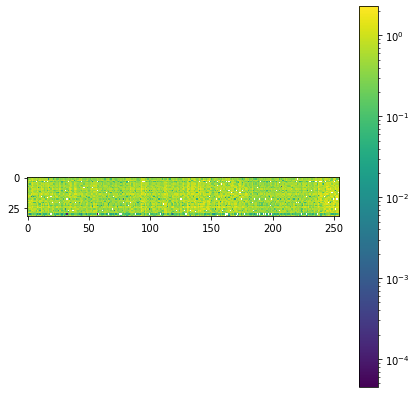

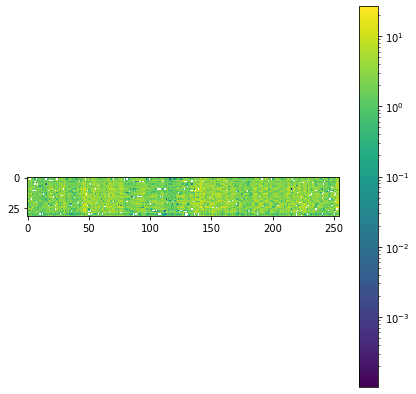

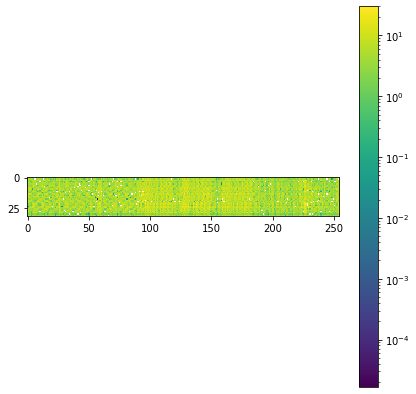

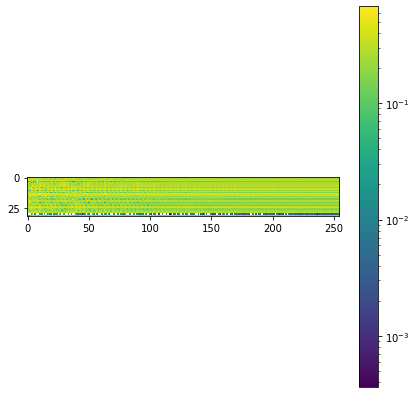

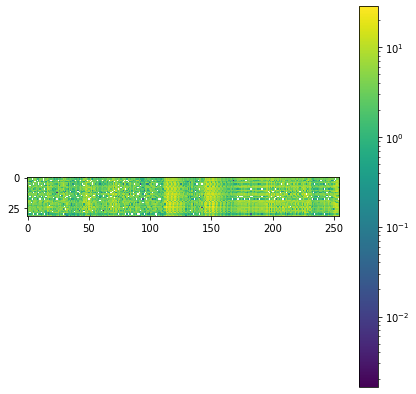

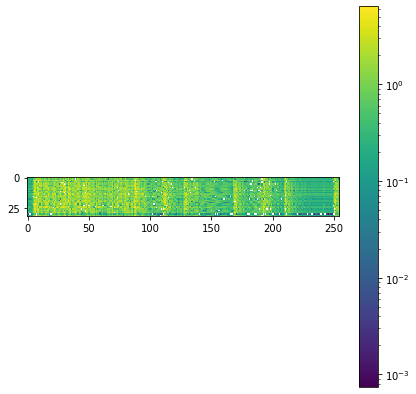

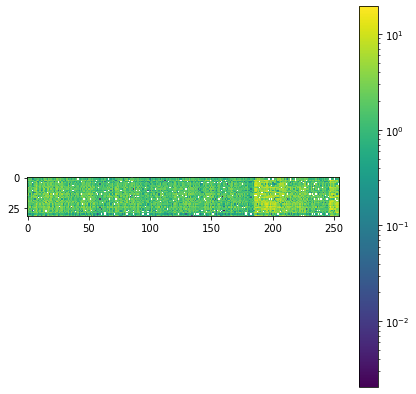

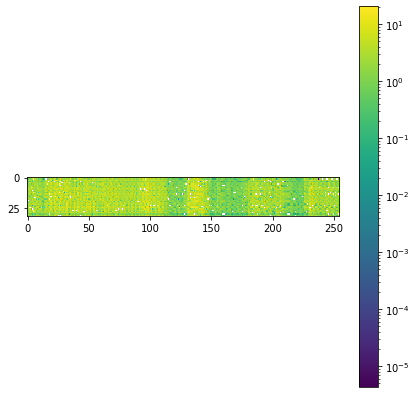

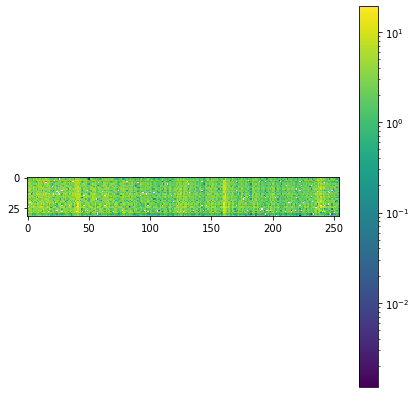

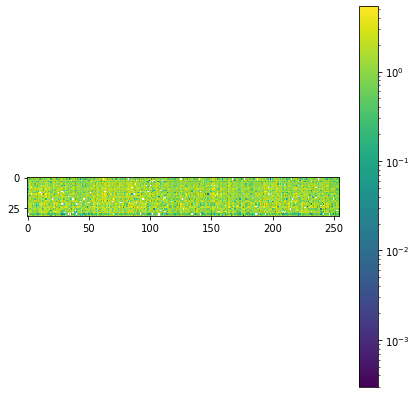

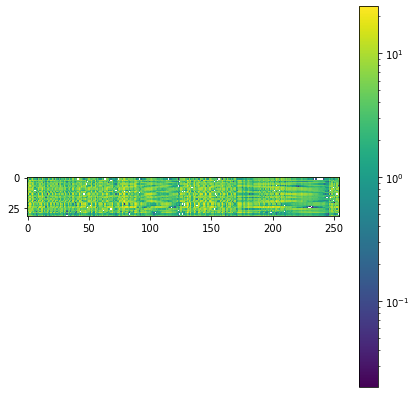

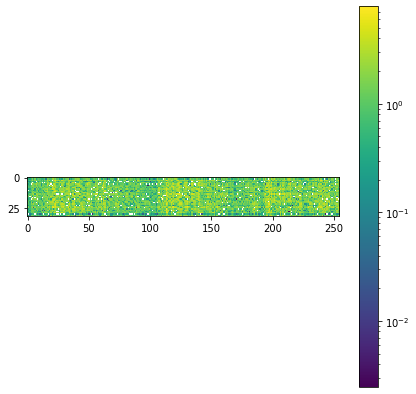

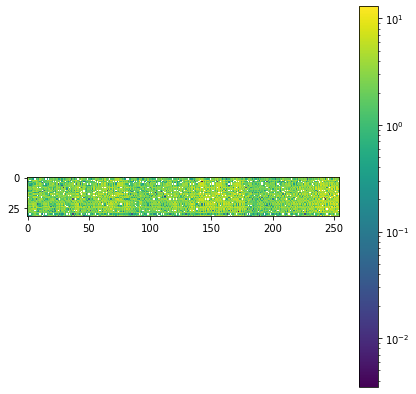

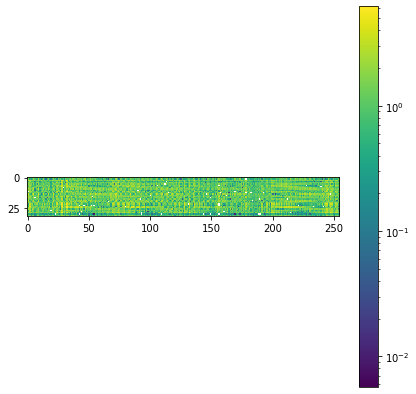

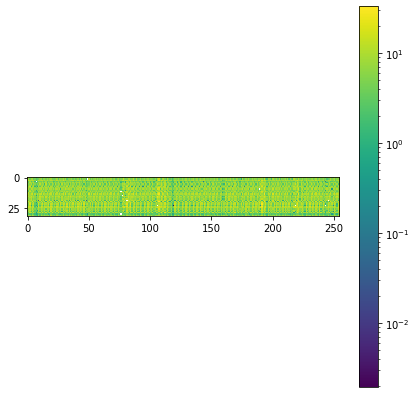

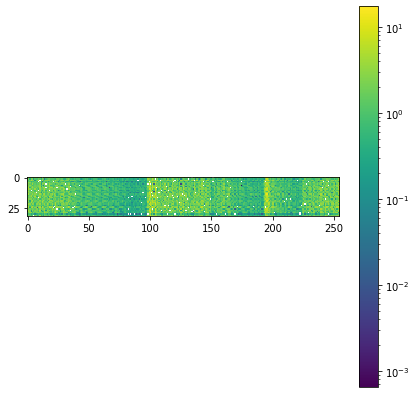

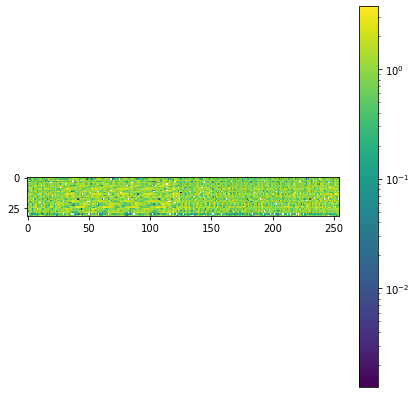

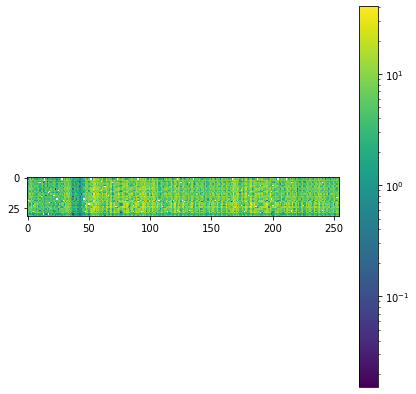

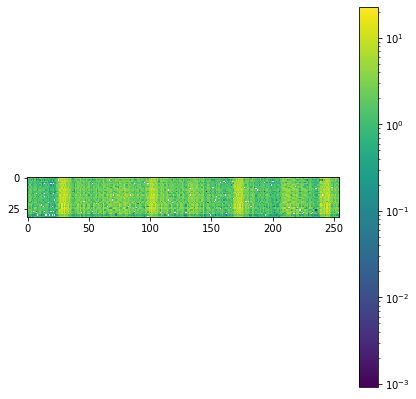

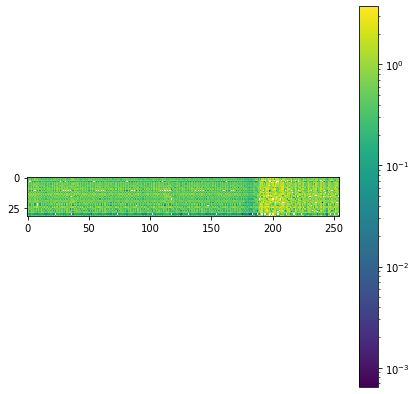

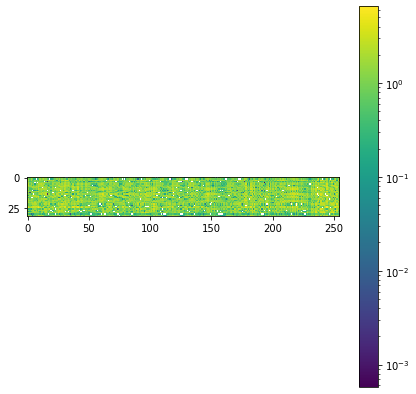

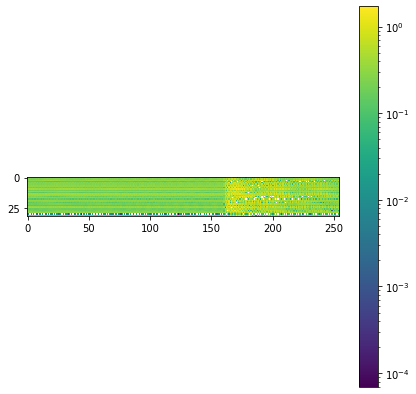

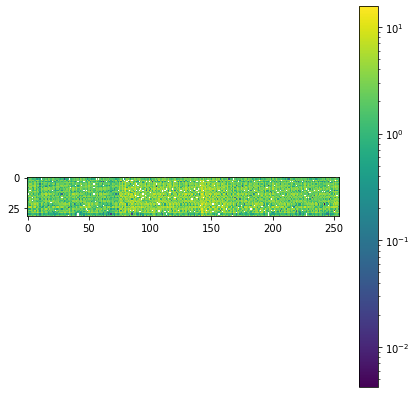

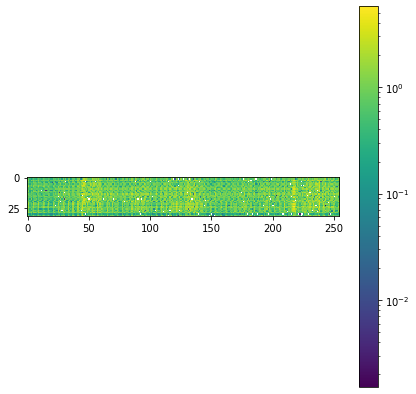

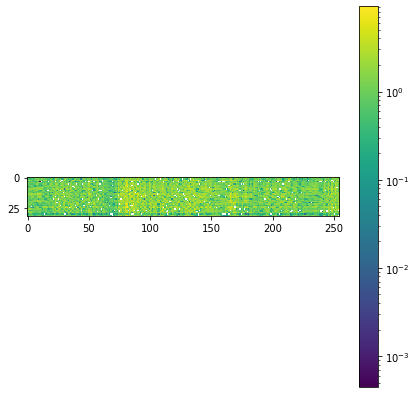

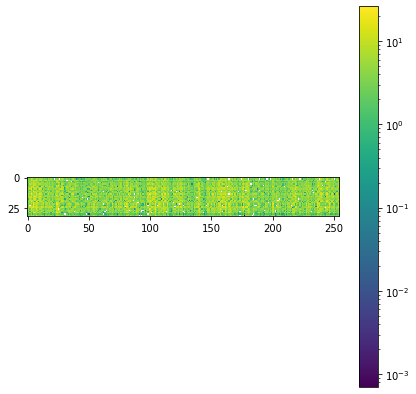

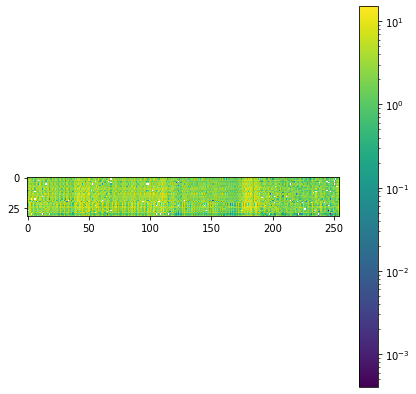

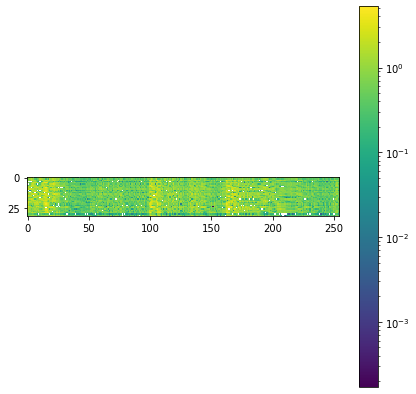

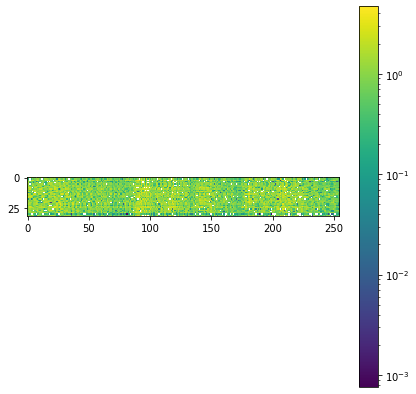

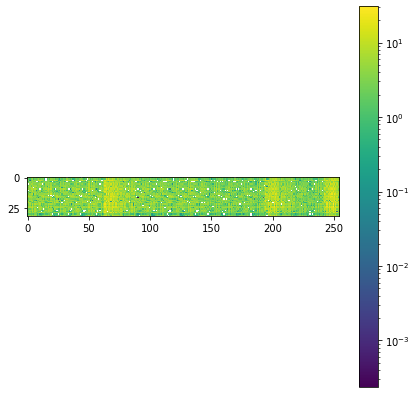

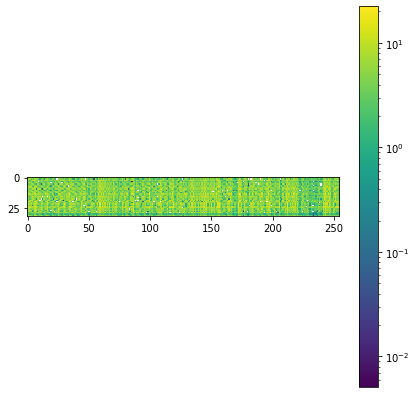

In [50]:
for sample_space in sample_latent_space:
  plt.figure(figsize=(7,7))
  plt.imshow(sample_space, norm=matplotlib.colors.LogNorm())
  plt.colorbar()
  plt.show()